In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as syp
from sympy import Q
from sympy.assumptions.refine import refine_sign
syp.init_printing()

# Deriving gradients for active inference in Continuous Time

Case with:
* one latent variable (the current belief about the angle position) 
* two observation dimensions (proprioceptive and visual)


### Names


* $\boldsymbol{\mu}$ - central value of the internal latent variable (belief about the generative process latent variable)   
* $\boldsymbol{\mu'}$  -  increment of $\mu$   * $\boldsymbol{\rho}$  - desired state of the generative process latent variable 
* $\mathbf{a}$  -  action done by the agent   
* $\mathbf{s_{p}(a)}$ - proprioceptive observation (**as a function of the action**) 
* $\mathbf{s_{v}(a)}$  - visual observation (**as a function of the action**)   
* $\mathbf{g(\mu)}$ - Forward model that predicts the visual observations based on the latent variable. (In this case the proprioceptive observation is in the same domain as the latent variable, thus thre is no need of a forward model for it)
* $\mathbf{f(\mu, \rho)}$ - Model of the dynamics of the generative controlling the response to the agent's action. The model's dynamics is biased so that it has $\rho$ as an attractor, so that the agent's belief leads to a real movement towards $\rho$ 

In [2]:
x, C,a, mu, mu1, rho = syp.symbols("x C a mu mu^' rho")
sigma_sp, sigma_sv, sigma_mu = syp.symbols('Sigma_s_p Sigma_s_v Sigma_mu')

g = syp.Function("g")(mu)
f = syp.Function("f")(mu, rho)
sp = syp.Function("s_p")(a)
sv = syp.Function("s_v")(a)

def normal(x, m, s): 
    return (1/(s*syp.sqrt(2*syp.pi)))*syp.exp(-((x - m)**2)/(2*s**2))

### Variational Laplace Encoded Free Energy

In [3]:
p_sp_mu = normal(sp, mu, sigma_sp)                                          
p_sv_mu = normal(sv, g, sigma_sv)
p_mu1_mu_rho = normal(mu1, f, sigma_mu)


F = -syp.log(p_sp_mu*p_sv_mu*p_mu1_mu_rho) + C

$P(s_p |\mu)$:

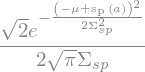

In [4]:
p_sp_mu

$P(s_v | g(\mu))$:

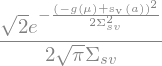

In [5]:
p_sv_mu

$P(\mu'| \mu, \rho)$:

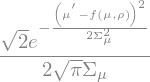

In [6]:
p_mu1_mu_rho

$F = -log(P(s_p |\mu)P(s_v | g(\mu))P(\mu'| \mu, \rho)) + C$

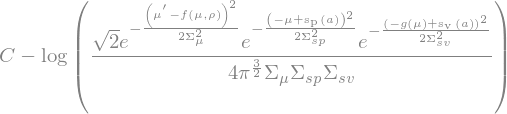

In [7]:
F

### Gradients

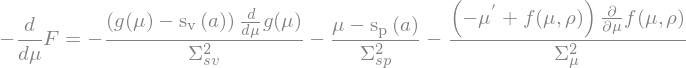

In [8]:
dmu = syp.diff(F, mu)
dmu = syp.simplify(dmu)
dmu = syp.collect(dmu, sigma_mu)
dmu = syp.collect(dmu,syp.diff(f, mu))
dmu = syp.collect(dmu, sigma_sv)
dmu = syp.collect(dmu, sigma_sp)
dmu = syp.collect(dmu,syp.diff(g, mu))
syp.Eq(-syp.Derivative("F", mu), -dmu)

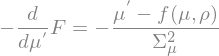

In [9]:
dmu1 = syp.diff(F, mu1)
dmu1 = syp.simplify(dmu1)
-syp.simplify(dmu1)
syp.Eq(-syp.Derivative("F", mu1),-syp.simplify(dmu1))

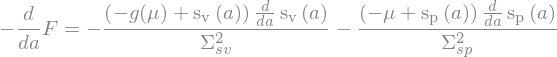

In [20]:
da = syp.simplify(syp.diff(F, a))
da = syp.collect(da, sigma_sp)
da = syp.collect(da, syp.diff(sp, a))
da = syp.collect(da, sigma_sv)
da = syp.collect(da, syp.diff(sv, a))
syp.Eq(-syp.Derivative("F", a),-da)

### World model dynamics

The dynamics are those of an harmonic oscillator:

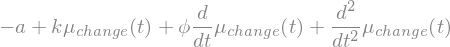

In [15]:
a, k, phi, z, t = syp.symbols("a k phi z t")
f = syp.Function("\mu_change")(t)
fmu = f.diff(t,t) + k*f + phi*f.diff(t) - a
fmu

whose solution is an equation of type:

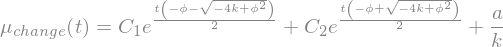

In [19]:
h = syp.dsolve(fmu, f)
h

Which is the analytic solution  for $\mu_{change}$ given an
action ($a$).

The prediction about $s_p(a, t)$ is then:

$s_p(a, t) = \mu_{change}(a, t) + \epsilon$ with $\epsilon \in \mathcal{N}(0, \Sigma_{s_p})$


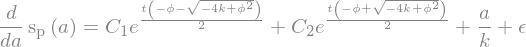

In [32]:
eps = syp.symbols("epsilon")
sp_pred = h.subs(a/k, a/k + eps)
syp.Eq(syp.diff(sp, a), sp_pred.rhs)

Thus, 

$ \frac{\partial{s_p(a)}}{\partial a} = \frac{1}{k}$

And the same goes for the visual observation

$ \frac{\partial{s_v(a)}}{\partial a} = \frac{1}{k}$.